# CNN Tabanlı Görüntü Sınıflandırma Projesi

**Adınız:** Eftalya Beril  
**Soyadınız:** ŞAHİN  
**Okul Numaranız:** 2212721037  
**GitHub Repo Bağlantısı:** https://github.com/EffieBerrie/CNN-Proje

## Model 2 – Özel Tasarlanmış (Custom) CNN Mimarisi

Bu modelde, hazır bir mimari yerine **sıfırdan tasarlanmış bir Convolutional Neural Network (CNN)**
kullanılmıştır. Amaç, çanta ve cüzdan görüntülerini ayırt edebilecek,
daha esnek ve problem odaklı bir yapı oluşturmaktır.

### Veri Ön İşleme ve Data Augmentation

Model 2’de görüntüler 0–1 aralığına normalize edilmiştir (`rescale=1./255`).
Ayrıca modelin genelleme yeteneğini artırmak için **data augmentation** uygulanmıştır.

Kullanılan veri artırma yöntemleri:
- Rastgele döndürme (rotation)
- Yatay ve dikey kaydırma (width & height shift)
- Yakınlaştırma (zoom)
- Yatay çevirme (horizontal flip)

Bu işlemler, modelin farklı görüntü koşullarına karşı daha dayanıklı olmasını sağlar.

### Veri Setinin Bölünmesi

Veri seti üç ana bölümden oluşmaktadır:
- **Train:** Modelin öğrenmesi için
- **Validation:** Eğitim sırasında performans takibi ve erken durdurma için
- **Test:** Nihai performans ölçümü için

Bu yapı sayesinde modelin genelleme kabiliyeti daha sağlıklı şekilde değerlendirilmiştir.

### Model Mimarisi – Genel Yapı

Model 2, birden fazla **Convolutional bloktan** oluşmaktadır.
Her blok şu sırayı takip eder:

**Conv2D → BatchNormalization → ReLU → MaxPooling**

Bu yapı:
- Öğrenmeyi stabilize eder
- Daha hızlı yakınsama sağlar
- Overfitting riskini azaltır

### Katmanların Kademeli Derinleştirilmesi

Modelde filtre sayısı katmanlar ilerledikçe artırılmıştır:
- 32 → 64 → 128 → 256

Bu yaklaşım sayesinde:
- Alt katmanlarda basit kenar ve şekiller
- Üst katmanlarda daha karmaşık görsel özellikler
öğrenilmektedir.

### Global Average Pooling Kullanımı

Klasik `Flatten` katmanı yerine **GlobalAveragePooling2D** kullanılmıştır.

Bu tercih:
- Parametre sayısını azaltır
- Modelin daha hızlı eğitilmesini sağlar
- Overfitting riskini düşürür

Özellikle küçük ve orta ölçekli veri setleri için daha avantajlıdır.

### Modelin Derlenmesi

Model aşağıdaki ayarlarla derlenmiştir:
- **Optimizer:** Adam
- **Learning Rate:** 0.001
- **Loss Function:** Categorical Crossentropy
- **Metric:** Accuracy

Bu ayarlar, çok sınıflı görüntü sınıflandırma problemleri için yaygın ve etkili bir seçimdir.

### Eğitim Süreci ve Callback Mekanizmaları

Eğitim sırasında üç farklı callback kullanılmıştır:

- **EarlyStopping:** Validation loss iyileşmediğinde eğitimi durdurur
- **ReduceLROnPlateau:** Validation loss sabitlendiğinde öğrenme oranını düşürür
- **ModelCheckpoint:** En iyi performansa sahip modeli diske kaydeder

Bu mekanizmalar sayesinde eğitim süreci daha kontrollü ve verimli hale getirilmiştir.

### Eğitim Sonuçlarının Görselleştirilmesi

Eğitim tamamlandıktan sonra:
- Eğitim ve doğrulama accuracy grafikleri
- Eğitim ve doğrulama loss grafikleri

oluşturulmuştur. Bu grafikler, modelin öğrenme sürecini ve olası overfitting durumlarını
görsel olarak analiz etmeye yardımcı olur.

### Test Süreci ve Performans Değerlendirmesi

Model 2, eğitim ve doğrulama aşamasında hiç kullanılmamış test verileri üzerinde
değerlendirilmiştir.

Değerlendirme sürecinde:
- Test accuracy değeri
- Confusion matrix
- Classification report (precision, recall, f1-score)

hesaplanarak modelin sınıflandırma başarısı detaylı şekilde analiz edilmiştir.


Veriler yükleniyor...
Found 84 images belonging to 2 classes.
Found 28 images belonging to 2 classes.
Found 22 images belonging to 2 classes.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          18,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 256)         │         294,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │              

 Total params: 456,162 (1.74 MB)

 Trainable params: 455,202 (1.74 MB)

 Non-trainable params: 960 (3.75 KB)


Model2 Eğitimi Başlıyor...
Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.6667 - loss: 0.9461 - val_accuracy: 0.5714 - val_loss: 1.1690 - learning_rate: 0.0010
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.7500 - loss: 0.6711 - val_accuracy: 0.5714 - val_loss: 1.5487 - learning_rate: 0.0010
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8571 - loss: 0.3481 - val_accuracy: 0.5714 - val_loss: 1.2328 - learning_rate: 0.0010
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8214 - loss: 0.3792 - val_accuracy: 0.5714 - val_loss: 1.0884 - learning_rate: 0.0010
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 925ms/step - accuracy: 0.8571 - loss: 0.3079 - val_accuracy: 0.5714 - val_loss: 1.3474 - learning_rate: 0.0010
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 939ms/step - accuracy: 0.8810 - loss: 0.2617 - val_accuracy: 0.5714 - val_loss: 1.4038 - learning_rate: 0.0010
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.8810 - loss: 0.3105 - 

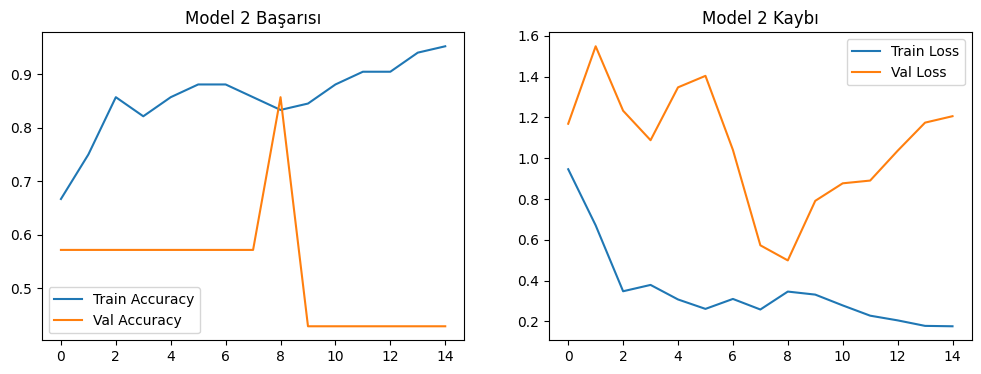


Test Süreci...
Model2 Test Accuracy (Çanta / Cüzdan): %63.64
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 789ms/step

Sınıflandırma Raporu:
              precision    recall  f1-score   support

       canta       0.58      1.00      0.73        11
      cuzdan       1.00      0.27      0.43        11

    accuracy                           0.64        22
   macro avg       0.79      0.64      0.58        22
weighted avg       0.79      0.64      0.58        22

Confusion Matrix:
[[11  0]
 [ 8  3]]


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# --- AYARLAR ---
IMG_SIZE = 128
BATCH_SIZE = 24
EPOCHS = 30
DATA_DIR = "../dataset"

# --- VERİ HAZIRLAMA (GENERATORS) ---
# Kendi modelimizi eğittiğimiz için renkleri 0-1 arasına sıkıştırıyoruz (Rescale)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,       # Döndürme açısını biraz artırdım
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

print("Veriler yükleniyor...")
train_gen = train_datagen.flow_from_directory(
    os.path.join(DATA_DIR, "train"),
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=True
)

val_gen = val_test_datagen.flow_from_directory(
    os.path.join(DATA_DIR, "val"),
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

test_gen = val_test_datagen.flow_from_directory(
    os.path.join(DATA_DIR, "test"),
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

num_classes = train_gen.num_classes
class_names = list(train_gen.class_indices.keys())

# --- MODEL 2 MİMARİSİ (Custom CNN) ---
# Conv -> BatchNorm -> ReLU -> Pool sıralaması daha modern ve stabildir.
model2 = models.Sequential([
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
    
    # 1. Blok
    layers.Conv2D(32, (3, 3), padding='same', use_bias=False),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    # 2. Blok
    layers.Conv2D(64, (3, 3), padding='same', use_bias=False),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    # 3. Blok
    layers.Conv2D(128, (3, 3), padding='same', use_bias=False),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    # 4. Blok (Daha derin öğrenme için ekstra bir katman eklenebilir, opsiyonel)
    layers.Conv2D(256, (3, 3), padding='same', use_bias=False),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    # Sınıflandırma Katmanı
    layers.GlobalAveragePooling2D(), # Flatten yerine bunu kullanmak parametre sayısını azaltır ve hızı artırır
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation="softmax")
])

model2.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Model özetini görelim
model2.summary()

# --- CALLBACKS ---
callbacks = [
    EarlyStopping(monitor="val_loss", patience=6, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor="val_loss", patience=3, factor=0.5, min_lr=1e-6, verbose=1),
    ModelCheckpoint("best_custom_cnn.keras", monitor="val_loss", save_best_only=True)
]

# --- EĞİTİM ---
print("\nModel2 Eğitimi Başlıyor...")
history2 = model2.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    callbacks=callbacks
)

# --- SONUÇLARI GÖRSELLEŞTİRME ---
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Val Accuracy')
plt.title('Model 2 Başarısı')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Val Loss')
plt.title('Model 2 Kaybı')
plt.legend()
plt.show()

# --- TEST VE RAPOR ---
print("\nTest Süreci...")
test_loss2, test_acc2 = model2.evaluate(test_gen, verbose=0)
print(f"Model2 Test Accuracy (Çanta / Cüzdan): %{test_acc2 * 100:.2f}")

# Detaylı Rapor
predictions = model2.predict(test_gen)
y_pred = np.argmax(predictions, axis=1)
y_true = test_gen.classes

print("\nSınıflandırma Raporu:")
print(classification_report(y_true, y_pred, target_names=class_names))

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))